In [32]:
import StatsKit
import CSV
import StatsPlots
using DataFrames
using GLM 
using HypothesisTests

In [12]:
waterstocks = CSV.read("WaterStocksUpdated.csv")

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI
,Int64,Int64,String,String,Int64,Float64,Float64
1,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.0,30.0
2,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
3,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
4,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
5,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
6,26463,19970109,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
7,26463,19970110,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
8,26463,19970113,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125
9,26463,19970114,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125


In [42]:
AWRprices = waterstocks[waterstocks[:TICKER] .== "AWR", [2,8]]
CTWSprices = waterstocks[waterstocks[:TICKER] .== "CTWS", [2,8]]
WTRprices = waterstocks[waterstocks[:TICKER] .== "WTR", [2,8]]
#sort!(waterstocks, [:TICKER, :date])

,date,PRC
,Int64,Float64
1,20040120,22.39
2,20040121,22.55
3,20040122,22.05
4,20040123,22.05
5,20040126,22.3
6,20040127,22.29
7,20040128,22.18
8,20040129,22.15
9,20040130,21.8


In [44]:
logAWRprices = log.(abs.(AWRprices[2]))
logWTRprices = log.(abs.(WTRprices[2]))
logCTWSprices = log.(abs.(CTWSprices[2]));

In [30]:
ΔlogAWRprices = diff(logAWRprices)
ΔlogWTRprices = diff(logWTRprices)
ΔlogCTWSprices = diff(logCTWSprices);

In [33]:
logAWRtest = ADFTest(logAWRprices, :none, 1)
#Panel 2A is reporting the ADF statistic

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          4.65432e-6

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.6965

Details:
    sample size in regression:          2641
    number of lags:                     1
    ADF statistic:                      0.0372512
    Critical values at 1%, 5%, and 10%: [-2.56659 -1.9411 -1.61672]


In [34]:
ΔlogAWRtest = ADFTest(ΔlogAWRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.10144

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          2640
    number of lags:                     1
    ADF statistic:                      -38.6998
    Critical values at 1%, 5%, and 10%: [-2.56659 -1.9411 -1.61672]


In [35]:
logCTWStest = ADFTest(logCTWSprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -4.54751e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5500

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -0.366696
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [36]:
ΔlogCTWStest = ADFTest(ΔlogCTWSprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.31273

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -46.494
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [37]:
logWTRtest = ADFTest(logWTRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -4.3264e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5972

Details:
    sample size in regression:          1246
    number of lags:                     1
    ADF statistic:                      -0.244662
    Critical values at 1%, 5%, and 10%: [-2.56753 -1.94122 -1.61661]


In [38]:
ΔlogWTRtest = ADFTest(ΔlogWTRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.08579

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          1245
    number of lags:                     1
    ADF statistic:                      -26.4324
    Critical values at 1%, 5%, and 10%: [-2.56754 -1.94122 -1.61661]


In [ ]:
#PANEL 2B:-------------------------------------------------------------------------------

In [60]:
#AWRprices = waterstocks[waterstocks[:TICKER] .== "AWR", 8]
matchedCTWSprices = CTWSprices[CTWSprices[:date] .>= 20040120, 2]
logmatchedCTWSprices = log.(abs.(matchedCTWSprices))

1248-element Vector{Float64}:
 3.366260811781259
 3.3502549029245805
 3.336481066942464
 3.342861804649192
 3.3407394126250414
 3.338967305126021
 3.3246762437544124
 3.3304171996011083
 3.332204510175204
 3.3368366225017656
 3.3339886319687055
 3.326832966373293
 3.32862668882732
 ⋮
 3.1328821117012247
 3.1978564576441255
 3.184698373066614
 3.185939324621936
 3.18924101973851
 3.139399623366404
 3.1471649773142003
 3.1354942159291497
 3.142858338444285
 3.1307001339644756
 3.132446096869813
 3.1616703510974213

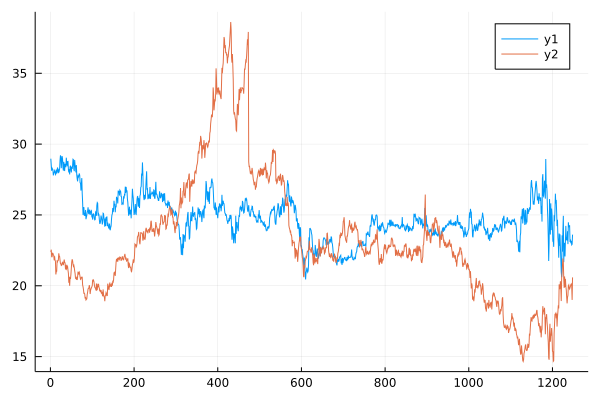

In [67]:
StatsPlots.plot(matchedCTWSprices)
StatsPlots.plot!(WTRprices[2])

In [68]:
CTWS_WTRdata = DataFrame(CTWS = logmatchedCTWSprices, WTR = logWTRprices)

,CTWS,WTR
,Float64,Float64
1,3.36626,3.10861
2,3.35025,3.11574
3,3.33648,3.09331
4,3.34286,3.09331
5,3.34074,3.10459
6,3.33897,3.10414
7,3.32468,3.09919
8,3.33042,3.09784
9,3.3322,3.08191


In [69]:
#reg = GLM.lm(@formula(Y ~ X), data)
CTWS_WTRregression = GLM.lm(@formula(CTWS ~ WTR), CTWS_WTRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + WTR

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  3.13321    0.0303738   103.16    <1e-99  3.07362     3.1928
WTR          0.0235062  0.00969767    2.42    0.0155  0.00448063  0.0425318
───────────────────────────────────────────────────────────────────────────

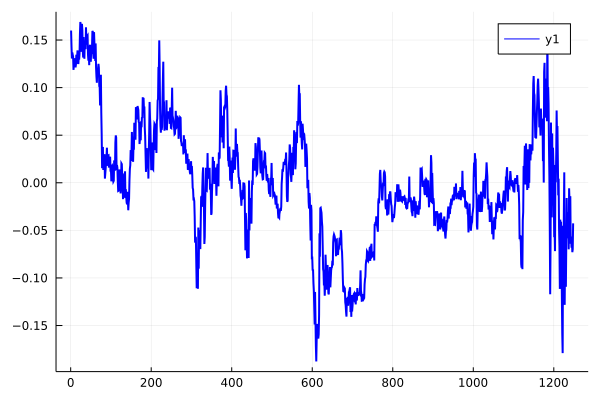

In [71]:
#StatsPlots.plot(ϵ̂, color="blue", lw=2.0, grid=true)
CTWS_WTRresiduals = residuals(CTWS_WTRregression)
StatsPlots.plot(CTWS_WTRresiduals, color="blue", lw=2.0, grid=true)

In [72]:
CTWS_WTRtest = ADFTest(CTWS_WTRresiduals, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0380312

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-05

Details:
    sample size in regression:          1246
    number of lags:                     1
    ADF statistic:                      -4.5541
    Critical values at 1%, 5%, and 10%: [-2.56753 -1.94122 -1.61661]


In [74]:
matchedAWR_CTWSprices = CTWSprices[CTWSprices[:date] .>= 19980701, 2]
logAWRmatchedCTWSprices = log.(abs.(matchedAWR_CTWSprices));

In [76]:
CTWS_AWRdata = DataFrame(CTWS = logAWRmatchedCTWSprices, AWR = logAWRprices);

In [77]:
CTWS_AWRregression = GLM.lm(@formula(CTWS ~ AWR), CTWS_AWRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + AWR

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   3.54431    0.0443709  79.88    <1e-99   3.4573     3.63131
AWR          -0.075283   0.0129558  -5.81    <1e-08  -0.100687  -0.0498784
──────────────────────────────────────────────────────────────────────────

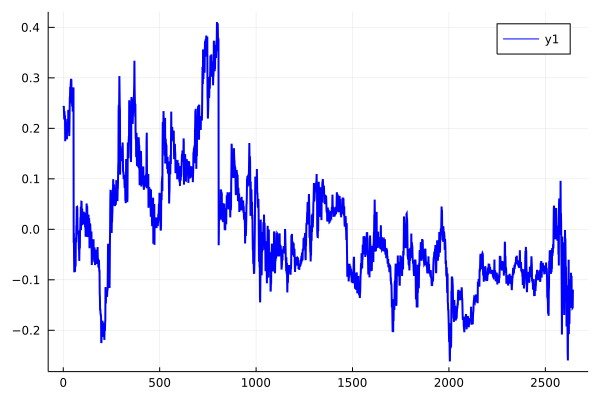

In [79]:
CTWS_AWRresiduals = residuals(CTWS_AWRregression)
StatsPlots.plot(CTWS_AWRresiduals, color="blue", lw=2.0, grid=true)

In [80]:
CTWS_AWRtest = ADFTest(CTWS_AWRresiduals, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.017606

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-05

Details:
    sample size in regression:          2641
    number of lags:                     1
    ADF statistic:                      -4.5247
    Critical values at 1%, 5%, and 10%: [-2.56659 -1.9411 -1.61672]


In [82]:
#WTR on AWR
matchedAWRprices = AWRprices[AWRprices[:date] .>= 20040120, 2]
logmatchedAWRprices = log.(abs.(matchedAWRprices));

In [83]:
WTR_AWRdata = DataFrame(WTR = logWTRprices, AWR = logmatchedAWRprices);

In [84]:
WTR_AWRregression = GLM.lm(@formula(WTR ~ AWR), WTR_AWRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + AWR

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   3.32822    0.0957581  34.76    <1e-99    3.14036   3.51609
AWR          -0.058006   0.0275214  -2.11    0.0353   -0.112    -0.00401254
───────────────────────────────────────────────────────────────────────────

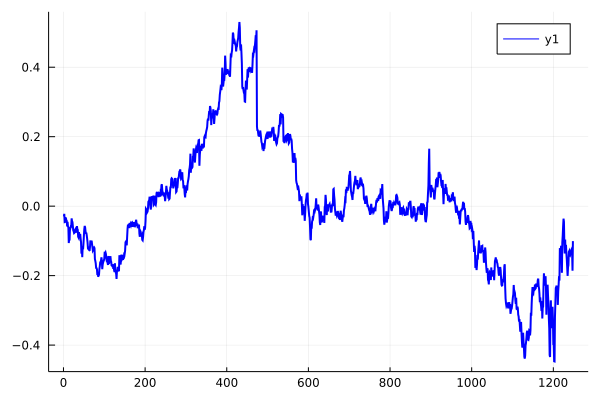

In [85]:
WTR_AWRresiduals = residuals(WTR_AWRregression)
StatsPlots.plot(WTR_AWRresiduals, color="blue", lw=2.0, grid=true)

In [86]:
WTR_AWRtest = ADFTest(WTR_AWRresiduals, :none, 1)
#the conclusion differs from in paper.

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.00569941

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.0645

Details:
    sample size in regression:          1246
    number of lags:                     1
    ADF statistic:                      -1.82617
    Critical values at 1%, 5%, and 10%: [-2.56753 -1.94122 -1.61661]


In [99]:
#CTWS on first differencing of CTWS and WTR
logmatchedCTWSprices
logWTRprices

ΔlogmatchedCTWSprices = diff(logmatchedCTWSprices)
ΔlogWTRprices = diff(logWTRprices)
ΔlogmatchedAWRprices = diff(logmatchedAWRprices)
ΔlogAWRmatchedCTWSprices = diff(logAWRmatchedCTWSprices)
ΔlogAWRprices = diff(logAWRprices)

2642-element Vector{Float64}:
  0.028437935320533292
 -0.018868484304382704
  0.0
 -0.014388737452099676
 -0.0024183808642814775
 -0.007290433262679308
 -0.009804000096620857
  0.021925360628965773
  0.0024067400305649578
 -0.019418085857101808
 -0.007380107297622285
  0.009828088936262525
 -0.03230094478832113
  ⋮
 -0.021847939525870164
  0.062276929521514646
 -0.0082097082512389
  0.006636143803808725
  0.031315533646167903
 -0.009199696898423593
 -0.006800644448017756
  0.012636938084012783
  0.0018359858278524932
 -0.06081571313955969
 -0.015717415895409648
  0.08475360461612924

In [105]:
PanelA1 = DataFrame(CTWS = logmatchedCTWSprices[2:1248], ΔCTWS = ΔlogmatchedCTWSprices, ΔWTR = ΔlogWTRprices)
PanelA2 = DataFrame(WTR = logWTRprices[2:1248], ΔCTWS = ΔlogmatchedCTWSprices, ΔWTR = ΔlogWTRprices)
PanelB1 = DataFrame(WTR = logWTRprices[2:1248], ΔWTR = ΔlogWTRprices, ΔAWR = ΔlogmatchedAWRprices)
PanelB2 = DataFrame(AWR = logmatchedAWRprices[2:1248], ΔWTR = ΔlogWTRprices, ΔAWR = ΔlogmatchedAWRprices)
PanelC1 = DataFrame(CTWS = logAWRmatchedCTWSprices[2:2643], ΔCTWS = ΔlogAWRmatchedCTWSprices, ΔAWR = ΔlogAWRprices)
PanelC2 = DataFrame(AWR = logAWRprices[2:2643], ΔCTWS = ΔlogAWRmatchedCTWSprices, ΔAWR = ΔlogAWRprices);

In [109]:
#WTR_AWRregression = GLM.lm(@formula(WTR ~ AWR), WTR_AWRdata)
PanelA1regression = GLM.lm(@formula(CTWS ~ ΔCTWS + ΔWTR), PanelA1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + ΔCTWS + ΔWTR

Coefficients:
──────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error        t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  3.20666    0.0017618  1820.10    <1e-99   3.2032     3.21011
ΔCTWS        0.469874   0.0980229     4.79    <1e-05   0.277565   0.662182
ΔWTR         0.012649   0.0958982     0.13    0.8951  -0.175491   0.200789
──────────────────────────────────────────────────────────────────────────

In [110]:
PanelA2regression = GLM.lm(@formula(WTR ~ ΔCTWS + ΔWTR), PanelA2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + ΔCTWS + ΔWTR

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  3.12674    0.00519478  601.90    <1e-99   3.11655     3.13693
ΔCTWS        0.0113403  0.289026      0.04    0.9687  -0.555693    0.578373
ΔWTR         0.506769   0.282762      1.79    0.0733  -0.0479733   1.06151
───────────────────────────────────────────────────────────────────────────

In [111]:
PanelB1regression = GLM.lm(@formula(WTR ~ ΔWTR + ΔAWR), PanelB1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + ΔWTR + ΔAWR

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  3.12669   0.00519356  602.03    <1e-99   3.11651    3.13688
ΔWTR         0.397731  0.300087      1.33    0.1853  -0.191001   0.986464
ΔAWR         0.216067  0.26719       0.81    0.4189  -0.308126   0.740259
─────────────────────────────────────────────────────────────────────────

In [112]:
PanelB2regression = GLM.lm(@formula(AWR ~ ΔWTR + ΔAWR), PanelB2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

AWR ~ 1 + ΔWTR + ΔAWR

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   3.47433   0.00533392  651.36    <1e-99   3.46386     3.48479
ΔWTR         -0.273733  0.308197     -0.89    0.3746  -0.878376    0.330911
ΔAWR          0.581347  0.274411      2.12    0.0343   0.0429876   1.11971
───────────────────────────────────────────────────────────────────────────

In [113]:
PanelC1regression = GLM.lm(@formula(CTWS ~ ΔCTWS + ΔAWR), PanelC1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + ΔCTWS + ΔAWR

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error        t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   3.2868     0.00231406  1420.36    <1e-99   3.28227    3.29134
ΔCTWS         0.486066   0.100697       4.83    <1e-05   0.288612   0.683519
ΔAWR         -0.0114646  0.108241      -0.11    0.9157  -0.223711   0.200782
────────────────────────────────────────────────────────────────────────────

In [114]:
PanelC2regression = GLM.lm(@formula(AWR ~ ΔCTWS + ΔAWR), PanelC2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

AWR ~ 1 + ΔCTWS + ΔAWR

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  3.42017   0.00346553  986.91    <1e-99   3.41338    3.42697
ΔCTWS        0.03851   0.150804      0.26    0.7985  -0.257196   0.334216
ΔAWR         0.481988  0.162102      2.97    0.0030   0.164128   0.799847
─────────────────────────────────────────────────────────────────────────